<a href="https://colab.research.google.com/github/Xerconia/Transitlytics/blob/main/hisa_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import and view data

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.mode.copy_on_write = True

os.getcwd()

'c:\\Users\\hisa\\Documents\\GitHub\\Transitlytics\\notebooks'

In [6]:
hh = pd.read_csv("../dataset/raw/hhv2pub.csv")
ldt = pd.read_csv("../dataset/raw/ldtv2pub.csv")
per = pd.read_csv("../dataset/raw/perv2pub.csv")
trip = pd.read_csv("../dataset/raw/tripv2pub.csv")
veh = pd.read_csv("../dataset/raw/vehv2pub.csv")

In [7]:
#print(hh)
#print(ldt)
#print(per)
trip.head()
#print(veh)


,HOUSEID,PERSONID,TRIPID,SEQ_TRIPID,VEHCASEID,FRSTHM,PARK,HHMEMDRV,TDWKND,TRAVDAY,LOOP_TRIP,DWELTIME,PUBTRANS,TRIPPURP,WHYFROM,WHYTRP1S,TRVLCMIN,STRTTIME,ENDTIME,TRPHHVEH,VEHID,TRPTRANS,NUMONTRP,ONTD_P1,ONTD_P2,ONTD_P3,ONTD_P4,ONTD_P5,ONTD_P6,ONTD_P7,ONTD_P8,ONTD_P9,ONTD_P10,NONHHCNT,HHACCCNT,WHODROVE,DRVR_FLG,PSGR_FLG,WHODROVE_IMP,PARK2_PAMOUNT,PARK2_PAYTYPE,PARK2,WHYTO,WALK,TRPMILES,WTTRDFIN,WTTRDFIN5D,WTTRDFIN2D,TDCASEID,VMT_MILE,GASPRICE,WHYTRP90,NUMADLT,HOMEOWN,RAIL,CENSUS_D,CENSUS_R,HH_HISP,DRVRCNT,CDIVMSAR,HHFAMINC,HH_RACE,HHSIZE,HHVEHCNT,LIF_CYC,MSACAT,MSASIZE,URBAN,URBANSIZE,URBRUR,TDAYDATE,WRKCOUNT,STRATUMID,R_AGE,R_SEX,WORKER,DRIVER,R_RACE,R_HISP,PROXY,EDUC,PRMACT,R_SEX_IMP,VEHTYPE,HHFAMINC_IMP
0,9000013002,1,1,1,900001300201,1,2,1,1,1,2,75,2,3,1,50,15,1435,1450,1,1,3,2,1,2,2,1,-1,-1,-1,-1,-1,-1,0,2,1,1,2,1,-1.0,-1,-1,15,2,3.902424,1.608362e+06,0.0,1.569852e+06,90000130020101,3.902424,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,39,2,2,1,1,2,1,7,3,2,3,11
1,9000013002,1,2,2,900001300201,1,2,1,1,1,2,-9,2,3,15,1,10,1605,1615,1,1,3,2,1,2,2,1,-1,-1,-1,-1,-1,-1,0,2,1,1,2,1,-1.0,-1,-1,1,1,3.902424,1.608362e+06,0.0,1.569852e+06,90000130020102,3.902424,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,39,2,2,1,1,2,1,7,3,2,3,11
2,9000013002,2,1,1,900001300202,1,-1,1,1,1,2,10,2,2,1,80,30,700,730,1,2,3,1,2,1,2,2,-1,-1,-1,-1,-1,-1,0,1,2,1,2,2,-1.0,-1,-1,12,-1,17.077067,2.208973e+06,0.0,2.274239e+06,90000130020201,17.077067,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,42,1,1,1,1,2,2,7,-1,1,3,11
3,9000013002,2,2,2,900001300202,1,-1,1,1,1,2,10,2,5,12,80,10,740,750,1,2,3,1,2,1,2,2,-1,-1,-1,-1,-1,-1,0,1,2,1,2,2,-1.0,-1,-1,12,-9,4.748291,2.208973e+06,0.0,2.274239e+06,90000130020202,4.748291,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,42,1,1,1,1,2,2,7,-1,1,3,11
4,9000013002,2,3,3,900001300202,1,-1,1,1,1,2,-9,2,2,12,1,30,800,830,1,2,3,1,2,1,2,2,-1,-1,-1,-1,-1,-1,0,1,2,1,2,2,-1.0,-1,-1,1,-9,14.098819,2.208973e+06,0.0,2.274239e+06,90000130020203,14.098819,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,42,1,1,1,1,2,2,7,-1,1,3,11


Question: Of the total trips between 0-3 miles, what percent is done by walking, biking, public transit, or personal vehicle? How about trips of 3-10 miles or 10+ miles?

In [8]:
#trpmiles, trptrans
#avg trip miles by transportation mode

#select variables of interest
trp_sel = trip[["TRPMILES","TRPTRANS"]]
trp_sel

#group trip miles by mode and take avg of miles
#trp_grp = trp_sel.groupby("TRPTRANS").mean().reset_index()
#trp_grp

trans_mapping_series = pd.Series({1: "Car", 
                            2: "Van",
                            3: "SUV/Crossover",
                            4: "Pickup truck",

                            6: "Recreational Vehicle",
                            7: "Motorcycle",
                            8: "Public or commuter bus",
                            9: "School bus",
                            10: "Street car or trolley car",
                            11: "Subway or elevated rail",
                            12: "Commuter rail",
                            13: "Amtrak",
                            14: "Airplane",
                            15: "Taxicab or limo service",
                            16: "Other ride-sharing service",
                            17: "Paratransit/ Dial a ride",
                            18: "Bicycle",
                            19: "E-scooter",
                            20: "Walked",
                            21: "Other (specify)"
                            })
trp_sel['TRPTRANS_label'] = trp_sel['TRPTRANS'].replace(trans_mapping_series)

In [ ]:
#apply weights

# Assuming the weight column is 'WTHHFIN' (adjust if different)
weight_column = 'WTHHFIN'

# Filter out excluded income values
hhv2 = hhv[~hhv['HHFAMINC'].isin([-7, -8])]

# Create weighted driver count
hhv2['WEIGHTED_DRVRCNT'] = hhv2['DRVRCNT'] * hhv2[weight_column]

# Group by region and income to compute weighted averages
def compute_weighted_avg(df):
    grouped = df.groupby('HHFAMINC').agg(
        TOTAL_WEIGHTED_DRIVERS=('WEIGHTED_DRVRCNT', 'sum'),
        TOTAL_WEIGHTED_HOUSEHOLDS=(weight_column, 'sum')
    ).reset_index()
    grouped['AVG_DRIVERS_PER_HH'] = grouped['TOTAL_WEIGHTED_DRIVERS'] / grouped['TOTAL_WEIGHTED_HOUSEHOLDS']
    return grouped

# Apply to each region
regions = {
    1: 'New England',
    2: 'Mid Atlantic',
    3: 'East North Central',
    4: 'West North Central',
    5: 'South Atlantic',
    6: 'East South Central',
    7: 'West South Central',
    8: 'Mountain',
    9: 'Pacific'
}

region_dfs = {}
for region_num, region_name in regions.items():
    region_df = hhv2[hhv2['CENSUS_D'] == region_num]
    region_avg = compute_weighted_avg(region_df)
    region_dfs[region_name] = region_avg

In [9]:
trp_sel = trp_sel[trp_sel["TRPTRANS_label"] != 'Airplane']


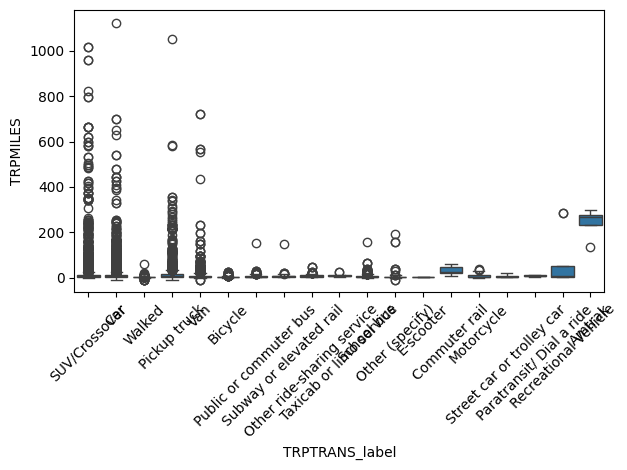

In [10]:
sns.boxplot( x=trp_sel["TRPTRANS_label"], y=trp_sel["TRPMILES"] )
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()       # Adjust layout to prevent clipping
plt.show()

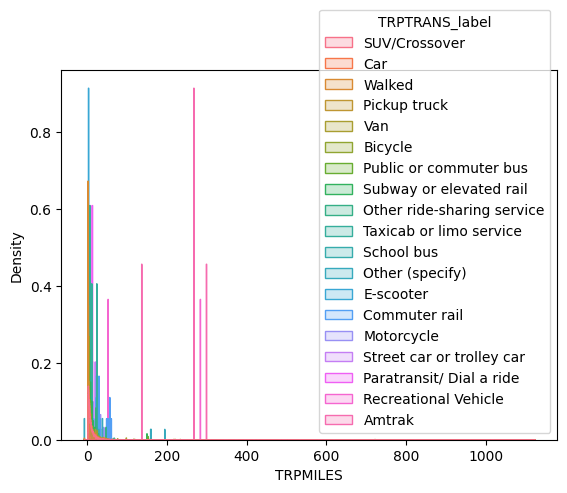

In [11]:
sns.histplot(data=trp_sel, x="TRPMILES", hue="TRPTRANS_label", element="step", stat="density", common_norm=False)
plt.show()

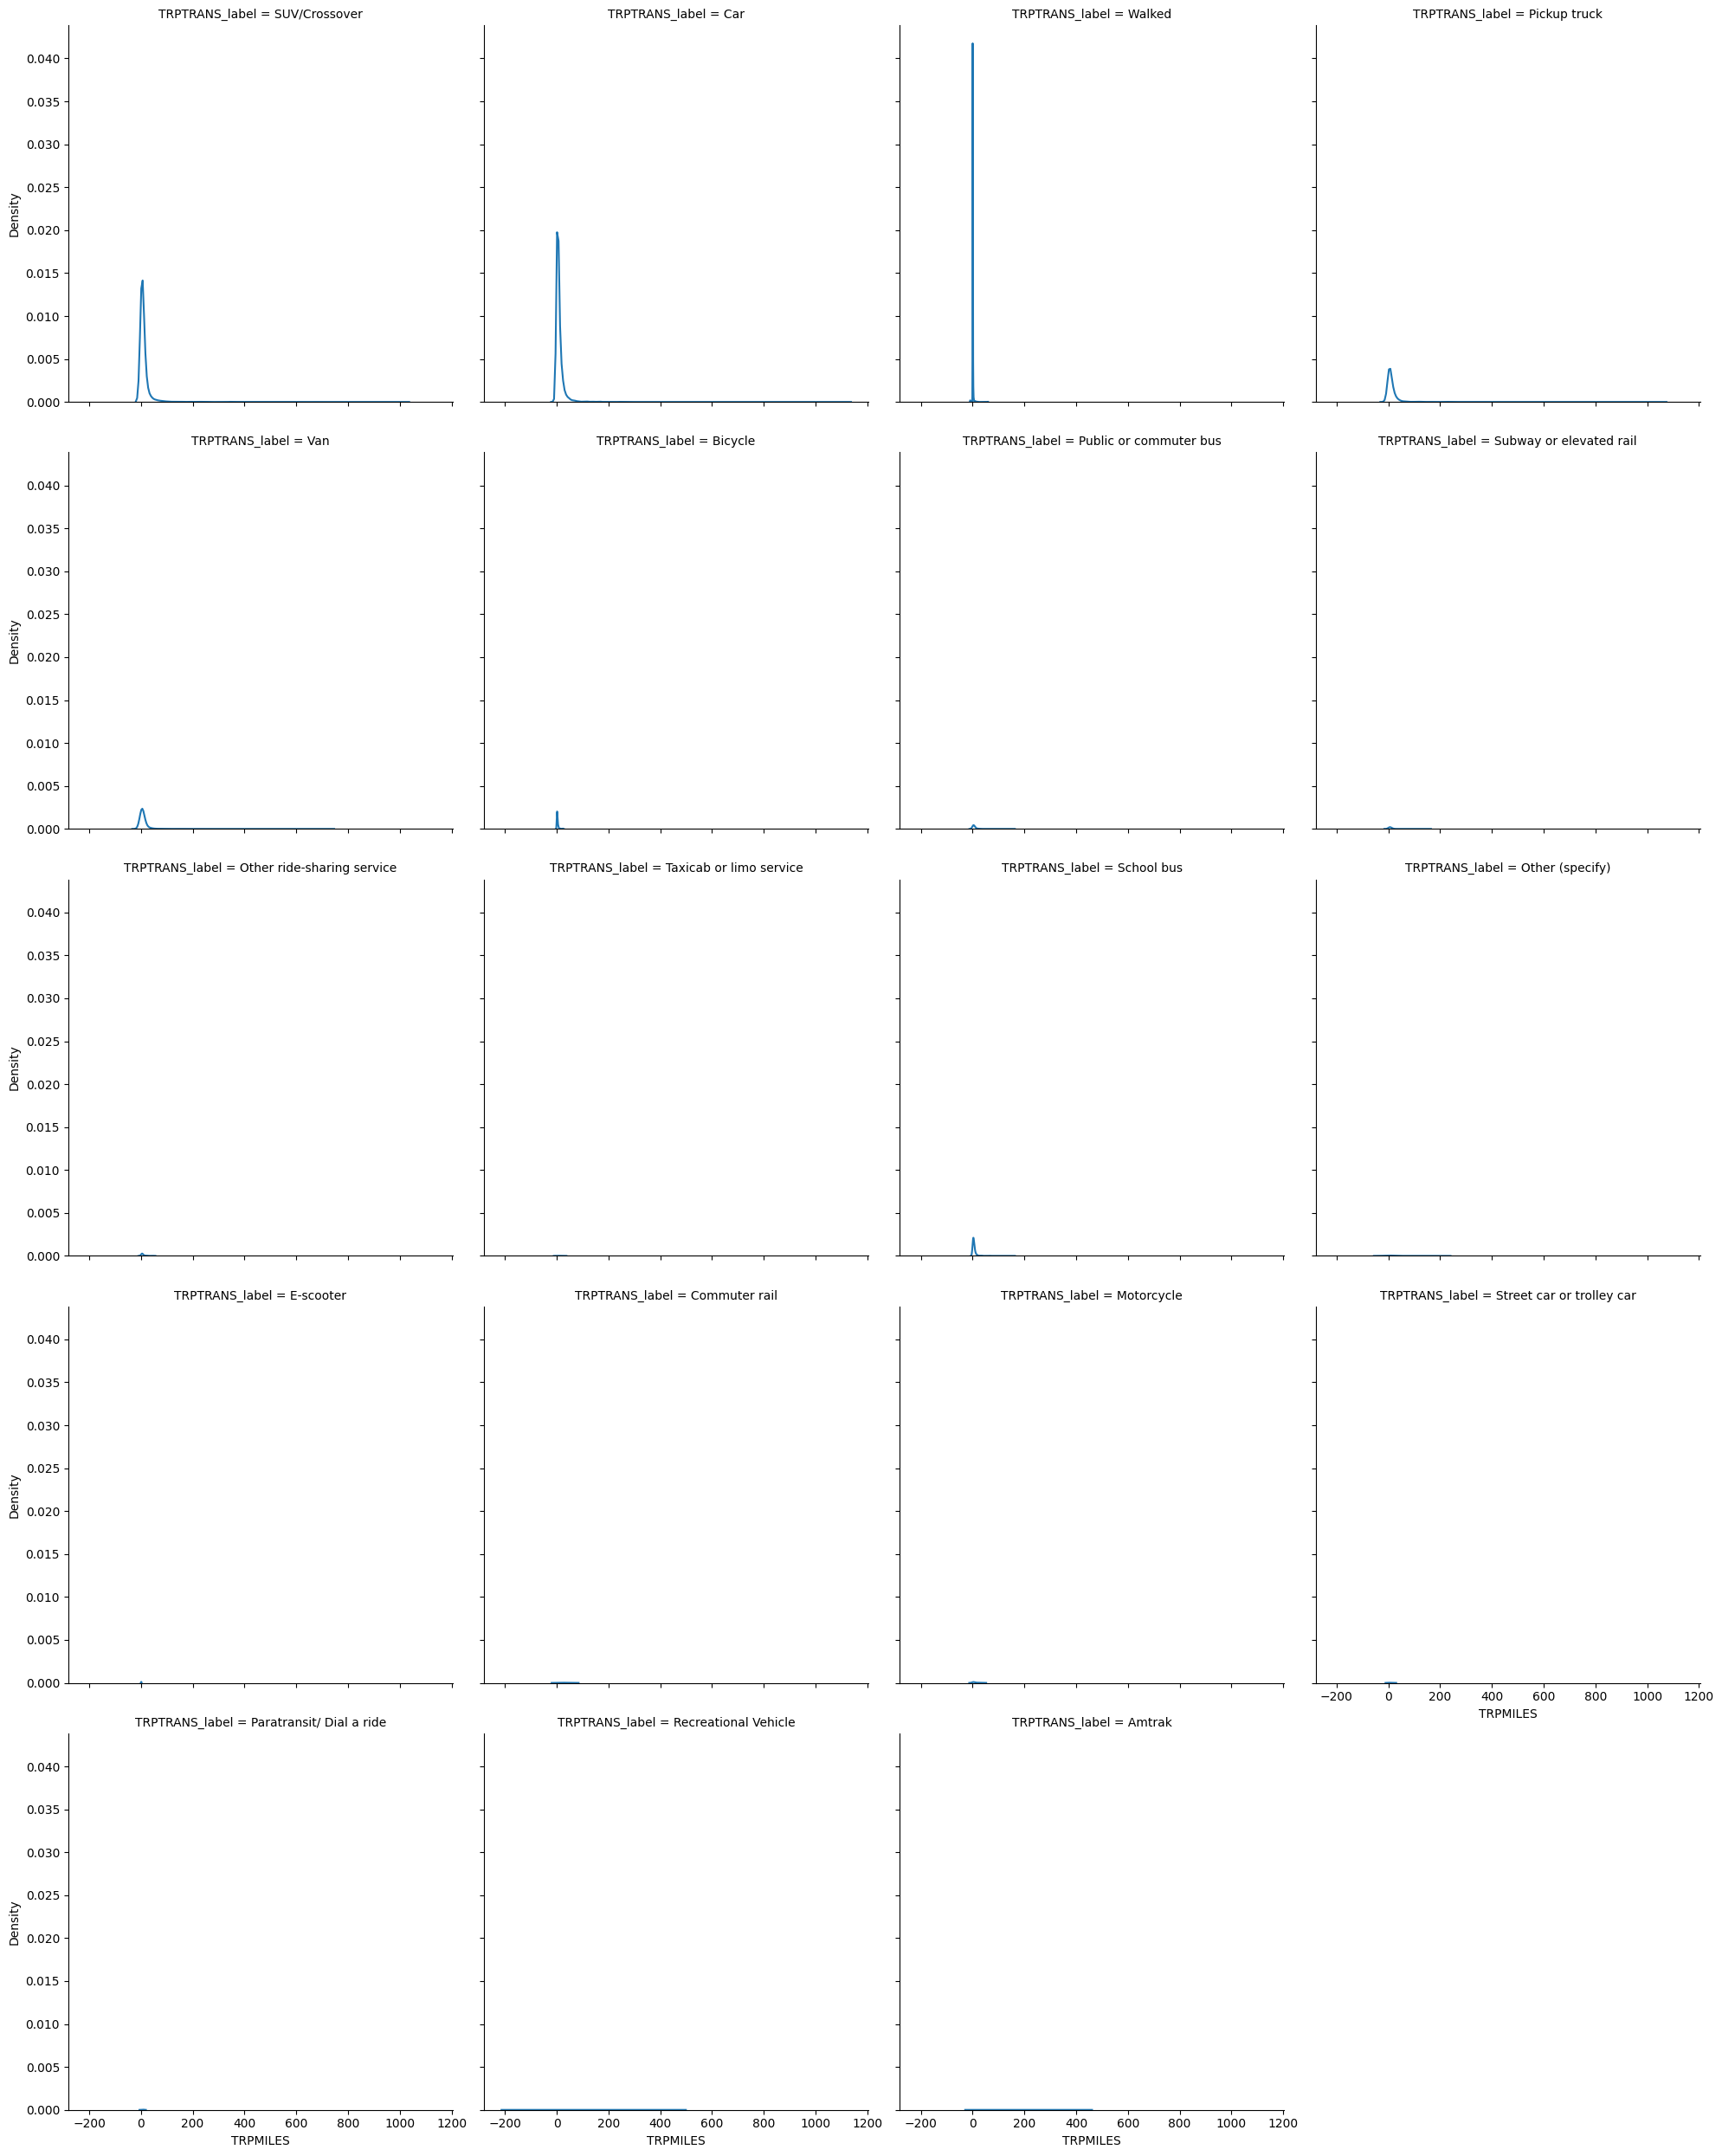

In [12]:
g = sns.displot(data=trp_sel, x="TRPMILES", col="TRPTRANS_label", col_wrap=4, kind="kde")
plt.show()

In [ ]:
# apply weights

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

sns.swarmplot(
   x=trp_sel["TRPTRANS_label"], # Group labels
   ax=ax,
   y=trp_sel["TRPMILES"], # Numeric variable
   palette='Set2', # Color set used
   hue=trp_sel["TRPTRANS_label"], # Add a legend
)

plt.xlabel('Category')
plt.ylabel('Data')
plt.show()

KeyboardInterrupt: 

#to do: visualize
https://python-graph-gallery.com/

Question: Does certain (zip codes -> people with higher incomes) tend to have more personal vehicle use for their daily trips?

In [4]:
trip_known = trip[~(trip["HHFAMINC"].isin([-7,-8]))]
trip_known.head()
#trip_known["HHFAMINC"].unique()

,HOUSEID,PERSONID,TRIPID,SEQ_TRIPID,VEHCASEID,FRSTHM,PARK,HHMEMDRV,TDWKND,TRAVDAY,LOOP_TRIP,DWELTIME,PUBTRANS,TRIPPURP,WHYFROM,WHYTRP1S,TRVLCMIN,STRTTIME,ENDTIME,TRPHHVEH,VEHID,TRPTRANS,NUMONTRP,ONTD_P1,ONTD_P2,ONTD_P3,ONTD_P4,ONTD_P5,ONTD_P6,ONTD_P7,ONTD_P8,ONTD_P9,ONTD_P10,NONHHCNT,HHACCCNT,WHODROVE,DRVR_FLG,PSGR_FLG,WHODROVE_IMP,PARK2_PAMOUNT,PARK2_PAYTYPE,PARK2,WHYTO,WALK,TRPMILES,WTTRDFIN,WTTRDFIN5D,WTTRDFIN2D,TDCASEID,VMT_MILE,GASPRICE,WHYTRP90,NUMADLT,HOMEOWN,RAIL,CENSUS_D,CENSUS_R,HH_HISP,DRVRCNT,CDIVMSAR,HHFAMINC,HH_RACE,HHSIZE,HHVEHCNT,LIF_CYC,MSACAT,MSASIZE,URBAN,URBANSIZE,URBRUR,TDAYDATE,WRKCOUNT,STRATUMID,R_AGE,R_SEX,WORKER,DRIVER,R_RACE,R_HISP,PROXY,EDUC,PRMACT,R_SEX_IMP,VEHTYPE,HHFAMINC_IMP
0,9000013002,1,1,1,900001300201,1,2,1,1,1,2,75,2,3,1,50,15,1435,1450,1,1,3,2,1,2,2,1,-1,-1,-1,-1,-1,-1,0,2,1,1,2,1,-1.0,-1,-1,15,2,3.902424,1.608362e+06,0.0,1.569852e+06,90000130020101,3.902424,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,39,2,2,1,1,2,1,7,3,2,3,11
1,9000013002,1,2,2,900001300201,1,2,1,1,1,2,-9,2,3,15,1,10,1605,1615,1,1,3,2,1,2,2,1,-1,-1,-1,-1,-1,-1,0,2,1,1,2,1,-1.0,-1,-1,1,1,3.902424,1.608362e+06,0.0,1.569852e+06,90000130020102,3.902424,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,39,2,2,1,1,2,1,7,3,2,3,11
2,9000013002,2,1,1,900001300202,1,-1,1,1,1,2,10,2,2,1,80,30,700,730,1,2,3,1,2,1,2,2,-1,-1,-1,-1,-1,-1,0,1,2,1,2,2,-1.0,-1,-1,12,-1,17.077067,2.208973e+06,0.0,2.274239e+06,90000130020201,17.077067,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,42,1,1,1,1,2,2,7,-1,1,3,11
3,9000013002,2,2,2,900001300202,1,-1,1,1,1,2,10,2,5,12,80,10,740,750,1,2,3,1,2,1,2,2,-1,-1,-1,-1,-1,-1,0,1,2,1,2,2,-1.0,-1,-1,12,-9,4.748291,2.208973e+06,0.0,2.274239e+06,90000130020202,4.748291,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,42,1,1,1,1,2,2,7,-1,1,3,11
4,9000013002,2,3,3,900001300202,1,-1,1,1,1,2,-9,2,2,12,1,30,800,830,1,2,3,1,2,1,2,2,-1,-1,-1,-1,-1,-1,0,1,2,1,2,2,-1.0,-1,-1,1,-9,14.098819,2.208973e+06,0.0,2.274239e+06,90000130020203,14.098819,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,42,1,1,1,1,2,2,7,-1,1,3,11


In [5]:
inc_mapping_series = pd.Series({1: r"01 - Less than \$10,000", 
                            2: r"02 - \$10,000 - \$14,999",
                            3: r"03 - \$15,000 - \$24,999",
                            4: r"04 - \$25,000 - \$34,999",
                            5: r"05 - \$35,000 - \$49,999",
                            6: r"06 - \$50,000 - \$74,999",
                            7: r"07 - \$75,000 - \$99,999",
                            8: r"08 - \$100,000 - \$124,999",
                            9: r"09 - \$125,000 - \$149,999",
                            10: r"10 - \$150,000 - \$199,999",
                            11: r"11 - \$200,000 or more"
                            })
trip_known['HHFAMINC_label'] = trip_known['HHFAMINC'].replace(inc_mapping_series)

trans_mapping_series = pd.Series({1: "Car", 
                            2: "Van",
                            3: "SUV/Crossover",
                            4: "Pickup truck",

                            6: "Recreational Vehicle",
                            7: "Motorcycle",
                            8: "Public or commuter bus",
                            9: "School bus",
                            10: "Street car or trolley car",
                            11: "Subway or elevated rail",
                            12: "Commuter rail",
                            13: "Amtrak",
                            14: "Airplane",
                            15: "Taxicab or limo service",
                            16: "Other ride-sharing service",
                            17: "Paratransit/ Dial a ride",
                            18: "Bicycle",
                            19: "E-scooter",
                            20: "Walked",
                            21: "Other (specify)"
                            })
trip_known['TRPTRANS_label'] = trip_known['TRPTRANS'].replace(trans_mapping_series)


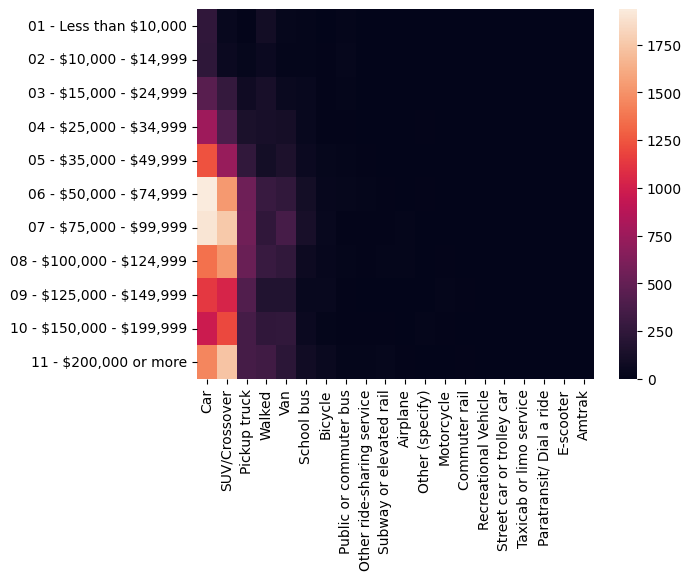

In [6]:
# Creating crosstab
crosstb = pd.crosstab(trip_known.HHFAMINC_label, trip_known.TRPTRANS_label).sort_index(axis = 0)
crosstb_ord = crosstb[crosstb.sum().sort_values(ascending=False).index]

# Heatmap
heatmap = sns.heatmap(crosstb_ord.rename_axis(index=None, columns=None))

Does this vary by whether the household is urban/rural?

In [7]:
#split into two datasets
urban = trip_known[trip_known["URBRUR"] == 1]

rural = trip_known[trip_known["URBRUR"] == 2]

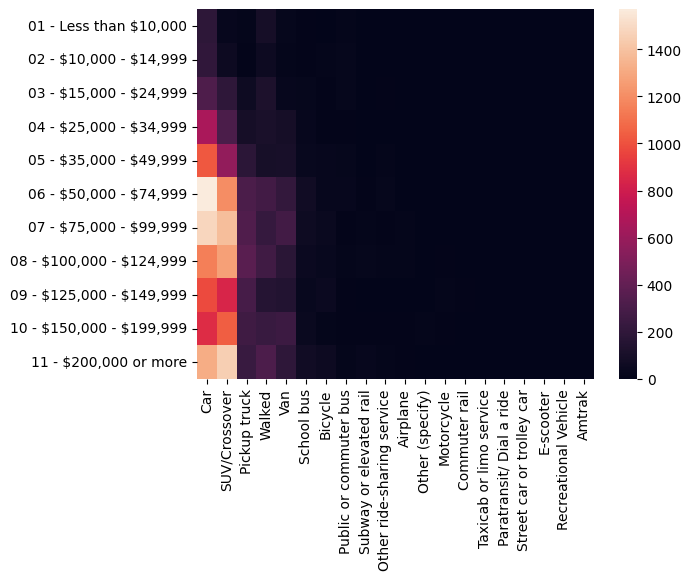

In [8]:
#Urban
# Creating crosstab
ucrosstb = pd.crosstab(urban.HHFAMINC_label, urban.TRPTRANS_label).sort_index(axis = 0)
ucrosstb_ord = ucrosstb[ucrosstb.sum().sort_values(ascending=False).index]
#print(ucrosstb)

# Heatmap
uheatmap = sns.heatmap(ucrosstb_ord.rename_axis(index=None, columns=None))

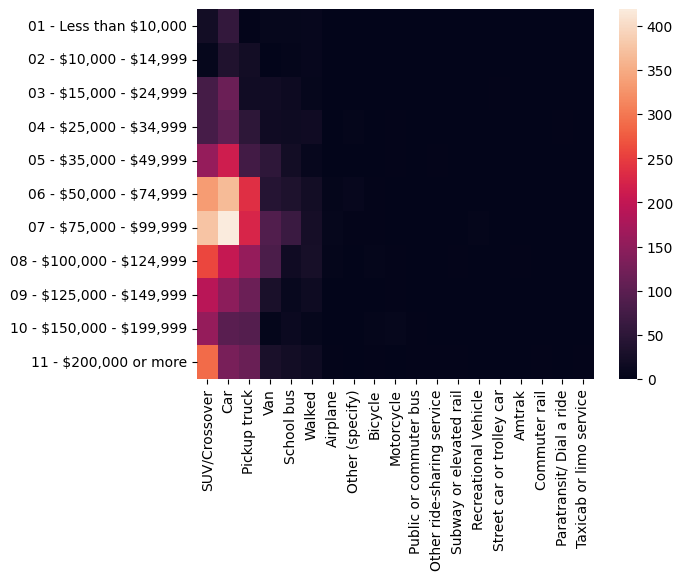

In [9]:
#Rural
# Creating crosstab
rcrosstb = pd.crosstab(rural.HHFAMINC_label, rural.TRPTRANS_label).sort_index(axis = 0)
rcrosstb_ord = rcrosstb[rcrosstb.sum().sort_values(ascending=False).index]
#print(rcrosstb)

# Heatmap
rheatmap = sns.heatmap(rcrosstb_ord.rename_axis(index=None, columns=None))